# $|V_{ub}|$ determination from the semileptonic $B\to\pi\ell\nu_{\ell}$ decays

**Theoretical Framework of this Project**

The description of semileptonic decays requires knowledge of the hadronic form factors. The set of form factors includes $f_+$ and $f_0$, which are relevant to the Standard Model predictions for charged current semileptonic $B^0\rightarrow\pi^-l^+\nu$.

**Form Factor Models**

*Model 1: Single Pole/Resonance*
$$f_{+}(q^2) = \frac{f_{+}(0)}{1 - q^2/m_{B*}^2}$$
where $f_{+}(0)$ is a normalization constant= 0.261(23), $m_{B*}$ = 5.324 GeV

In [1]:
################################################################################
#                              IMPORTING LIBRARIES                             #
################################################################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

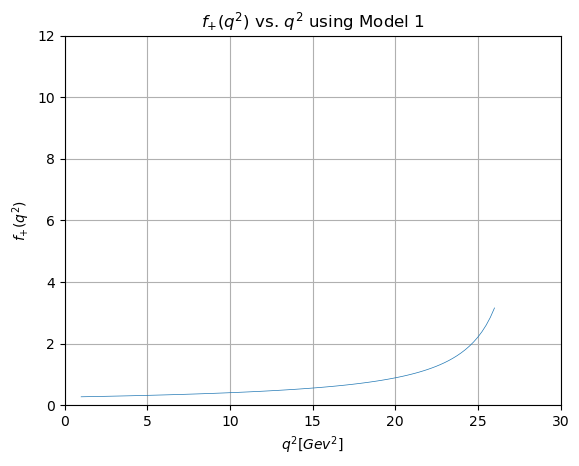

In [2]:
# Defining the constants
f_plus0 = 0.261
mb_star = 5.324

"Defining the model 1"
def f1_plus(q_2):
    f1_plus = f_plus0 / (1 - q_2 / mb_star**2)
    return f1_plus

# Create an array for q_2 values from 0 to 30
q_2 = np.linspace(1, 26, 100)  # 100 points between 0 and 30

# Plot the graph
plt.plot(q_2, f1_plus(q_2), linewidth=0.5)
plt.ylim(0, 12)
plt.xlim(0, 30)

# Add labels and title
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel('$f_{+}(q^2)$')
plt.title('$f_{+}(q^2)$ vs. $q^2$ using Model 1')
plt.grid()

# Display the plot
plt.show()


*Model 2: Multi-Pole Model*
$$f_{+}(q^2) = \frac{f_{+}(0)}{(1 - q^2/m_{B^{*}}^2)(1 - \alpha q^2/m_{B^{*}}^2)}$$
where $\alpha = 0.54(17)$

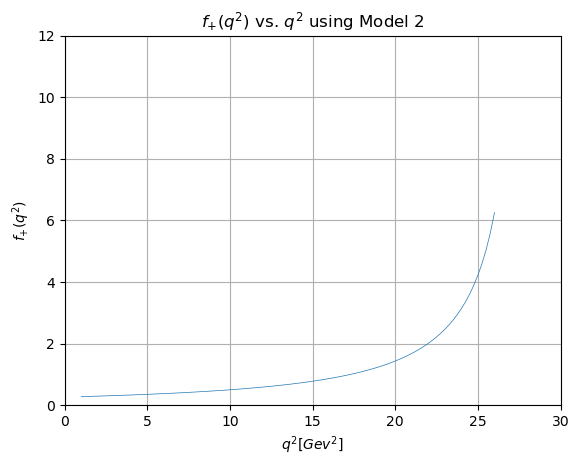

In [3]:
# Defining constants
f_plus0 = 0.261 
mb_star = 5.324
alpha = 0.54 

"Defining the Model 2"
def f2_plus(q_2):
    f2_plus = (f_plus0) / ((1 - q_2 / mb_star**2) * (1 - alpha * q_2 / mb_star**2))
    return f2_plus

# Create an array for q_2 values from 0 to 30 (same as before)
q_2 = np.linspace(1, 26, 100)

# Plot the graph
plt.plot(q_2, f2_plus(q_2), linewidth=0.5)
plt.ylim(0, 12)
plt.xlim(0, 30)

# Add labels and title
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel('$f_{+}(q^2)$')
plt.title('$f_{+}(q^2)$ vs. $q^2$ using Model 2')
plt.grid()

# Display the plot
plt.show()


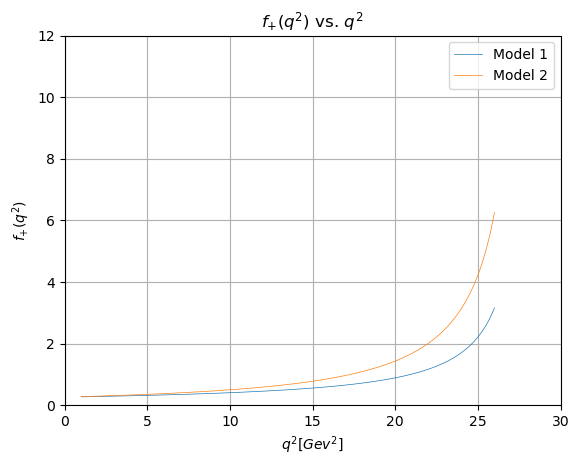

In [4]:
"Plotting both of the models together"

# Plot the first function f1_plus
plt.plot(q_2, f1_plus(q_2), label='Model 1', linewidth=0.5)

# Plot the second function f2_plus
plt.plot(q_2, f2_plus(q_2), label='Model 2', linewidth=0.5)

# Set y-axis limits
plt.ylim(0, 12)

# Set x-axis limits
plt.xlim(0, 30)

# Add labels and title
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel('$f_{+}(q^2)$')
plt.title('$f_{+}(q^2)$ vs. $q^2$')

# Show legend to differentiate the two functions
plt.legend()
plt.grid()
# Display the plot
plt.show()


**Branching Ratio Equation**

Branching Ratio equation is used for determining the value of $V_{ub}$ for Model 1 and 2,

$$BR=\frac{1}{\Gamma_{B^0}}\int_0^{(m_B-m_\pi)^2}\,\mathrm{d}q^2\frac{G_F^2|V_{ub}^2\lambda^\frac{1}{2}(m_B^2,m_\pi^2,q^2)|}{128m_B^3\pi^3q^2}\left(1-\frac{m_l^2}{q^2}\right)^2\\\times\left[\frac{2q^2}{3}\lambda(m_B^2,m_\pi^2,q^2)\left(1+\frac{m_l^2}{2q^2}\right)|f_+(q^2)|^2\right]$$
 
where $BR=1.50(6)\times10^{-4}$, is found experimentally, $\Gamma_{B^0}=4.33\times10^{-13}$, $m_B=5.27966\textrm{ GeV}$, $m_\pi=0.13957\textrm{ GeV}$, $q^2$ is invariant mass of the lepton pair (the lepton-neutrino pair), $G_F=1.166\times10^{-5}$, and $m_l$ is taken to be the mass of an electron, $m_e=0.511\textrm{ MeV}$. $\lambda$ is function in three variables, defined as $\lambda(x,y,z)=x^2+y^2+z^2-2(xy+xz+yz)$.


In [5]:
#Defining the constants

br=1.50e-4
gamma_B0= 4.33e-13
GF= 1.166e-5
mb_Gev= 5.27966
mpi_Gev= 0.13957
ml_Mev= 0.511

def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)

In [6]:
#Performing integration

def integrand1(q_2):
    term1= (GF**2 *np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2))) / (128*mb_Gev**3 *np.pi**3 *q_2)
    term2= (1-(ml_Mev * 10**(-3))**2 / q_2)**2
    term3= (2*q_2/3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2) * (1+((ml_Mev*10**(-3))**2/(2*q_2)))*np.abs(f1_plus(q_2))**2
    return term1* term2* term3

def integrand2(q_2):
    term1= (GF**2 *np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2))) / (128*mb_Gev**3 *np.pi**3 *q_2)
    term2= (1-(ml_Mev * 10**(-3))**2 / q_2)**2
    term3= (2*q_2/3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2) * (1+((ml_Mev*10**(-3))**2/(2*q_2)))*np.abs(f2_plus(q_2))**2
    return term1* term2* term3

# Integration limits
lower_lim = 0
upper_lim = (mb_Gev - mpi_Gev)**2

# Integral Terms
result1, error1 = quad(integrand1, lower_lim, upper_lim)
result2, error2 = quad(integrand2, lower_lim, upper_lim)

# V_ub
v_ub1 = np.sqrt(br * gamma_B0 / result1)
print("Model 1:", v_ub1)
v_ub2 = np.sqrt(br * gamma_B0 / result2)
print("Model 2:", v_ub2)

Model 1: 0.004621850869111274
Model 2: 0.003708115656038955


Plotting the following theoretical expression as a function of $q^2$ by substituting the values of $V_{ub}$ obtained from Model 1 and Model 2,

 $$\frac{dB}{dq^2}=\frac{G_F^2|V_{ub}|^2\lambda^{1/2}(m_B^2,m_\pi^2,q^2)}{\Gamma_{B0}128m_B^3\pi^3q^2}\bigg(1-\frac{m_l^2}{q^2}\bigg)^2\times\bigg\{\frac{2q^2}{3}\lambda(m_B^2,m_\pi^2,q^2)\bigg(1+\frac{m_l^2}{2q^2}\bigg)|f_+(q^2)|^2\bigg\}$$

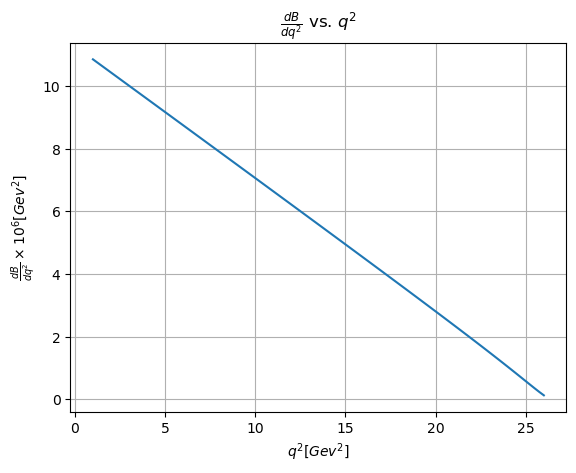

In [7]:
"Plotting for Model 1"

def dB_dq_2_1(q_2):
    # Initialize empty array to store the result
    result = np.zeros_like(q_2)

    # Loop through each q_2 value and calculate dB/dq_2
    for i, q in enumerate(q_2):
        term1 = (GF**2 *np.abs(v_ub1)**2* np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128*gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q)))**2 * np.abs(f1_plus(q))**2
        result[i] = term1 * term2 * term3
    return result

# Calculate dB/dq_2 values
dB_dq_2_value_1 = dB_dq_2_1(q_2)
dB_dq_2_values_1_1= dB_dq_2_value_1*1e6

plt.plot(q_2, dB_dq_2_values_1_1)
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.grid()
plt.show()

In [8]:
"Plotting for Model 2"

def dB_dq_2(q_2):
    # Initialize empty array to store the result
    result = np.zeros_like(q_2)

    # Loop through each q_2 value and calculate dB/dq_2
    for i, q in enumerate(q_2):
        term1 = (GF**2 *np.abs(v_ub2)**2* np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128*gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q)))**2 * np.abs(f2_plus(q))**2
        result[i] = term1 * term2 * term3

    return result

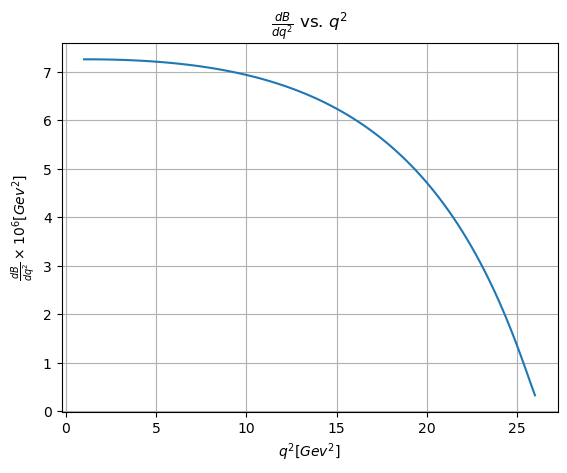

In [9]:
# Calculate dB/dq_2 values
dB_dq_2_values = dB_dq_2(q_2)
dB_dq_2_values_1= dB_dq_2_values*1e6

plt.plot(q_2, dB_dq_2_values_1)
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.grid()
plt.show()

In [10]:
################################################################################
#                  IMPORTING THE EXPERIMENTAL DATA                             #
################################################################################

file_path = r"C:\Users\hp\Downloads\DataDistribution.txt"

with open(file_path, 'r') as file:
    content = file.read()
    print(content)

{1, 7.2, 0.7000000000000001}
{3, 7.140000000000001, 0.45999999999999996}
{5, 6.7, 0.39}
{7, 7.56, 0.43}
{9, 6.440000000000001, 0.43}
{11, 7.170000000000001, 0.45999999999999996}
{13, 6.670000000000001, 0.47000000000000003}
{15, 6.33, 0.48}
{17, 6.2, 0.44000000000000006}
{19, 4.32, 0.43}
{21, 4.25, 0.41}
{23, 3.4000000000000004, 0.42000000000000004}
{25.2, 1.17, 0.26}


In [11]:
# Provided data points
data_text = """{1, 7.2, 0.7000000000000001}
{3, 7.140000000000001, 0.45999999999999996}
{5, 6.7, 0.39}
{7, 7.56, 0.43}
{9, 6.440000000000001, 0.43}
{11, 7.170000000000001, 0.45999999999999996}
{13, 6.670000000000001, 0.47000000000000003}
{15, 6.33, 0.48}
{17, 6.2, 0.44000000000000006}
{19, 4.32, 0.43}
{21, 4.25, 0.41}
{23, 3.4000000000000004, 0.42000000000000004}
{25.2, 1.17, 0.26}"""

# Split the data into lines
lines = data_text.split("\n")

# Clean each line by removing the curly braces
cleaned_data = [line.replace("{", "").replace("}", "") for line in lines]

# Convert the data to float arrays
q_2_values = np.array([float(line.split(",")[0]) for line in cleaned_data])
db_dq_2_values = np.array([float(line.split(",")[1]) for line in cleaned_data])
err = np.array([float(line.split(",")[2]) for line in cleaned_data])

Paired experimental data of $q^2$ and $\frac{dB}{dq^2}$ were fitted to the following equation.

$$\frac{dB}{dq^2}=\frac{G_F^2|V_{ub}|^2\lambda^{1/2}(m_B^2,m_\pi^2,q^2)}{\Gamma_{B0}128m_B^3\pi^3q^2}\bigg(1-\frac{m_l^2}{q^2}\bigg)^2\times\bigg\{\frac{2q^2}{3}\lambda(m_B^2,m_\pi^2,q^2)\bigg(1+\frac{m_l^2}{2q^2}\bigg)|f_+(q^2)|^2\bigg\}$$


Furthermore, Chi-Square Test was performed to extract the optimal value of $V_{ub}$ and $\alpha$ 

$$\chi^2 = \sum_{i} \left( \frac{\Delta_i^{\text{data}}}{\sigma_i^{\text{data}}} \right)^2$$
$$\Delta_i^{\text{data}} = \left(\frac{dB}{dq^2}\right)_i^{\text{data}} - \left(\frac{dB}{dq^2}\right)_i^{\text{theory}}$$


In [12]:
"Defining the constants"
f_plus0 = 0.261
mb_star = 5.324
gamma_B0 = 4.33e-13
GF = 1.166e-5
mb_Gev = 5.27966
mpi_Gev = 0.13957
ml_Mev = 0.511

def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)                    

In [13]:
def f_plus2(q_2):
    f_plus = f_plus0 / ((1 - q_2 / mb_star**2) * (1 - alpha * q_2 / mb_star**2))
    return f_plus

def dB_dq_2(q_2_values, alpha, v_ub):
    result = np.zeros_like(q_2_values)
    for i, q in enumerate(q_2_values):
        term1 = (GF**2 * np.abs(v_ub)**2 * np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q))) * np.abs(f_plus2(q))**2
        result[i] = term1 * term2 * term3
    return result

"Performing Chi-Square Fitting"

# Grid search over alpha and v_ub
x = np.linspace(0, 1, 40)
y = np.linspace(0, 5, 40)
chi_square_values = np.zeros((40, 40))

for alpha_index, alpha in enumerate(x):
    for v_ub_index, v_ub in enumerate(y):
        # Calculate dB/dq_2 values for current alpha and v_ub
        dB_dq_2_values_model = dB_dq_2(q_2_values, alpha, v_ub)

        # Calculate chi-square for the current model and ignore the third data point
        chi_square = np.sum(((db_dq_2_values[:13]-dB_dq_2_values_model[:13])/err[:13])**2)
        
        # Store the chi-square value in the 2D array
        chi_square_values[alpha_index, v_ub_index] = chi_square

# Find the minimum chi-square value and its corresponding indices
min_chi_square = np.min(chi_square_values)
optimal_alpha_index, optimal_v_ub_index = np.unravel_index(np.argmin(chi_square_values), chi_square_values.shape)

# Get the corresponding optimal_alpha and optimal_v_ub using the index
optimal_alpha = x[optimal_alpha_index]
optimal_v_ub = y[optimal_v_ub_index]

# Print the results
print("\n Minimum Value of χ² is:", min_chi_square)
print("Optimal Vub value corresponding to minimum chi-square:", optimal_v_ub)
print("Optimal alpha value corresponding to minimum chi-square:", optimal_alpha)
dof = 11 #calculated using no of data points-parameters
goodness_of_fit= min_chi_square/dof
print("Goodness of fit:",goodness_of_fit)


 Minimum Value of χ² is: 10.541379684460747
Optimal Vub value corresponding to minimum chi-square: 3.7179487179487176
Optimal alpha value corresponding to minimum chi-square: 0.5384615384615384
Goodness of fit: 0.958307244041886


In [14]:
"Fitted Model-2"
def f_plus2(q_2):
    f_plus = f_plus0 / ((1 - q_2 / mb_star**2) * (1 - optimal_alpha * q_2 / mb_star**2))
    return f_plus


def dB_dq_2(q_2_values):
    result = np.zeros_like(q_2_values)
    for i, q in enumerate(q_2_values):
        term1 = (GF**2 * np.abs(optimal_v_ub)**2 * np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q))) * np.abs(f_plus2(q))**2
        result[i] = term1 * term2 * term3
    return result
print(dB_dq_2(q_2_values))

[7.29634551 7.28410612 7.24364438 7.16740039 7.04563658 6.86568578
 6.6108716  6.25891478 5.77948488 5.13021385 4.24961844 3.04302151
 1.15749549]


*Plotting $\frac{dB}{dq^2}$ as a function of $q^2$ using Model 1, to observe whether the Model 1  fits the experimental data points accurately*

[1.08510403e-05 1.00099932e-05 9.16843248e-06 8.32622105e-06
 7.48316474e-06 6.63898350e-06 5.79325897e-06 4.94533796e-06
 4.09414385e-06 3.23777741e-06 2.37259454e-06 1.49095076e-06
 4.86061222e-07]


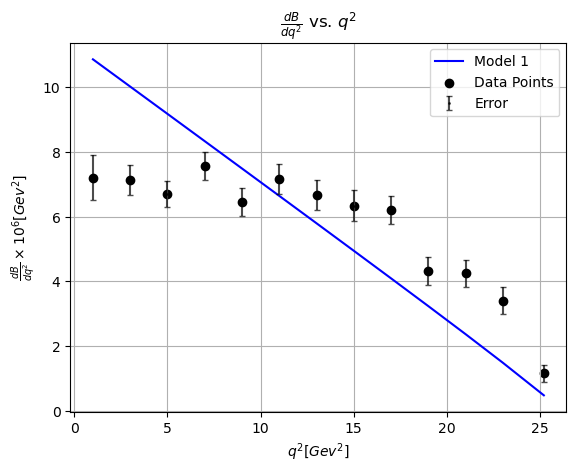

In [15]:
def f_plus(q_2):
    f_plus = f_plus0 / (1 - q_2 / mb_star**2) 
    return f_plus

def dB_dq_2_1(q_2_values):
    result = np.zeros_like(q_2_values)
    for i, q in enumerate(q_2_values):
        term1 = (GF**2 * np.abs(v_ub1)**2 * np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q))) * np.abs(f_plus(q))**2
        result[i] = term1 * term2 * term3
    return result       
print(dB_dq_2_1(q_2_values))             

plt.plot(q_2_values, dB_dq_2_1(q_2_values)*1e6, label="Model 1", color='blue')
plt.scatter(q_2_values, db_dq_2_values, color='black', label="Data Points")
plt.errorbar(q_2_values, db_dq_2_values, yerr=err, fmt='o', color='black', markersize=1, label="Error", capsize=2, alpha=0.7)
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.grid()
plt.legend()
plt.show()

As we can observe from the graph, the $\frac{dB}{dq^2}$ values obtained using Model-1 does not fit the experimental data points. This observation highlights the necessity of introducing a new model to better fit the data points to obtain a more optimal value of $V_{ub}$

*Plotting $\frac{dB}{dq^2}$ as a function of $q^2$ using Model 2, to observe whether the Model 2  fits the experimental data points accurately*

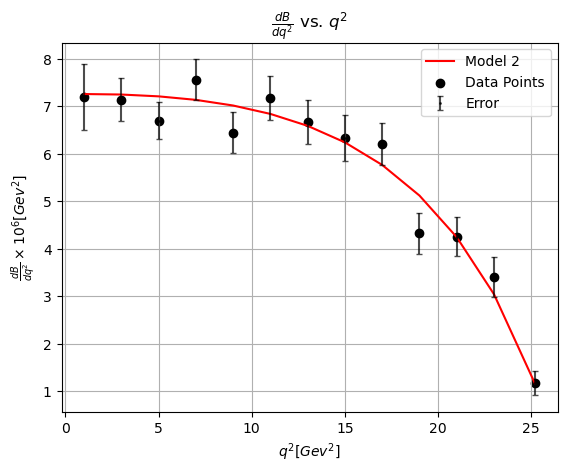

In [16]:
alpha= 0.54

def f_plus2(q_2):
    f_plus = f_plus0 / ((1 - q_2 / mb_star**2) * (1 - alpha * q_2 / mb_star**2))
    return f_plus

def dB_dq_2_2(q_2_values):
    result = np.zeros_like(q_2_values)
    for i, q in enumerate(q_2_values):
        term1 = (GF**2 * np.abs(v_ub2)**2 * np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q))) * np.abs(f_plus2(q))**2
        result[i] = term1 * term2 * term3
    return result

plt.plot(q_2_values, dB_dq_2_2(q_2_values)*1e6, label="Model 2", color='red')
plt.scatter(q_2_values, db_dq_2_values, color='black', label="Data Points")
plt.errorbar(q_2_values, db_dq_2_values, yerr=err, fmt='o', color='black', markersize=1, label="Error", capsize=2, alpha=0.7)
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.grid()
plt.legend()
plt.show()

*As we can observe from the graph, the $\frac{dB}{dq^2}$ values obtained using Model-2 fits the experimental data points more precisely than Model-1.
This observation highlights the multi-pole model as a better estimate in obtaining a more optimal value of $V_{ub}$*

**Now plotting the fitted Model-2 and Model-2 together for comparison**

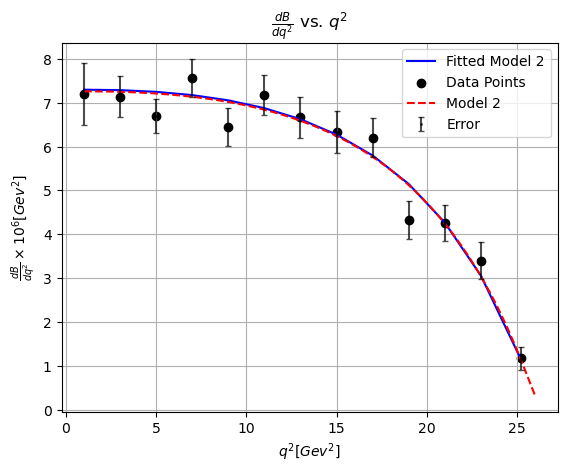

In [17]:
plt.plot(q_2_values, dB_dq_2(q_2_values), label="Fitted Model 2", color='blue')
plt.scatter(q_2_values, db_dq_2_values, color='black', label="Data Points")
plt.plot(q_2, dB_dq_2_values_1,label="Model 2", color='red',linestyle='dashed')
plt.errorbar(q_2_values, db_dq_2_values, yerr=err, fmt='o', color='black', markersize=1, label="Error", capsize=2, alpha=0.7)

plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.grid()
plt.legend()
plt.show()

*From the above graph we can conclude that our Model-2 follows the behaviour of the experimental data. Hence Model-2 is a better estimate for obtaining optimal values of $V_{ub}$.*

**The Standard Model only provides the structure of the transitions but does not predict specific values for parameters such as $V_{ub}$. Thus, experimental data is necessary.**